In [1]:
import numpy as np
import scipy.optimize as spopt
import pandas as pd

import matplotlib.pyplot as plt 
import os

# define variables to be computed

In [2]:
def MagneticLenght (IntegratedMagneticField, CentralMagneticField):
    magnetic_lenght = IntegratedMagneticField / CentralMagneticField
    return magnetic_lenght

In [3]:
def LinearLaw (x, a, b):
    y = a*x + b
    return y

In [4]:
def MagneticRigidity (check):
    i = 3
    df = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/MagneticRigidity.csv")
    Magnetic_Rigidity = df.Brho.values[i]
    Momentum = df.p.values[i]
    return Magnetic_Rigidity, Momentum

In [5]:
BRHO, BeamMomentum = MagneticRigidity(1)
print(BRHO, "Tm --> which corresponds to p = ", BeamMomentum, "GeV/c which is an approx of ", BRHO*2.998e8/(1e9))

0.33356 Tm --> which corresponds to p =  0.1 GeV/c which is an approx of  0.100001288


# get subdirectories in quads folder --> get quads family names

In [6]:
quads_directory_path = "/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/"

quads_families = ["QDC", "QDN", "QDS", "QDW7", "QDW9", "QFC", "QFN", "QFNS", "QFW6", "QFW8"]
print(quads_families)

['QDC', 'QDN', 'QDS', 'QDW7', 'QDW9', 'QFC', 'QFN', 'QFNS', 'QFW6', 'QFW8']


In [7]:
Strenght_Madx = [-0.463211805, -0.463211805, -0.55815376, -0.526485398, -0.413027795, 0.513836351, 0.513836351, 0.55815376, 0.434013208, 0.560993622]

/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QDC
0 central_field_PXMQNERNWP.csv
1 int_field_PXMQNERNWP.csv


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QDN
0 central_field_PXMQNEONWP.csv
1 int_field_PXMQNEONWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QDS

/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QFNS
1 central_field_PXMQNEMNWP.csv
2 int_field_PXMQNEMNWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QDW7
0 central_field_PXMQNFDAWP.csv
1 int_field_PXMQNFDAWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QDW9
1 central_field_PXMQNFFAWP.csv
2 int_field_PXMQNFFAWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QFC
3 central_field_PXMQNEPCWP.csv
No measurements done on the central field for this magnet family
4 int_field_PXMQNEPCWP.csv


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QFN
0 central_field_PXMQNENNWP.csv
1 int_field_PXMQNENNWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QFNS
1 central_field_PXMQNEMNWP.csv
2 int_field_PXMQNEMNWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QFW6
0 central_field_PXMQNFCAWP.csv
1 int_field_PXMQNFCAWP.csv
/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/QFW8
0 central_field_PXMQNFEAWP.csv
1 int_field_PXMQNFEAWP.csv


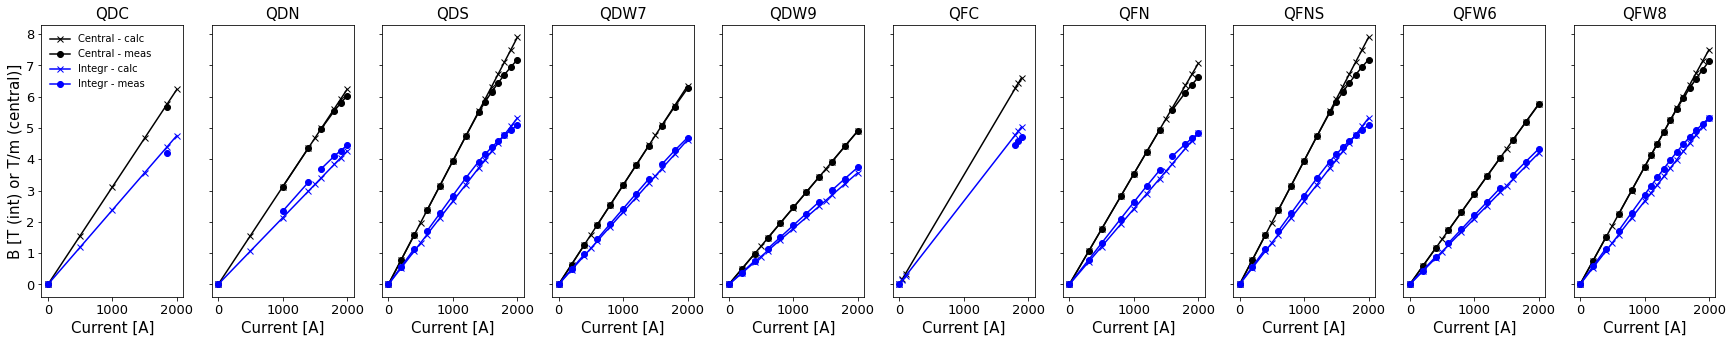

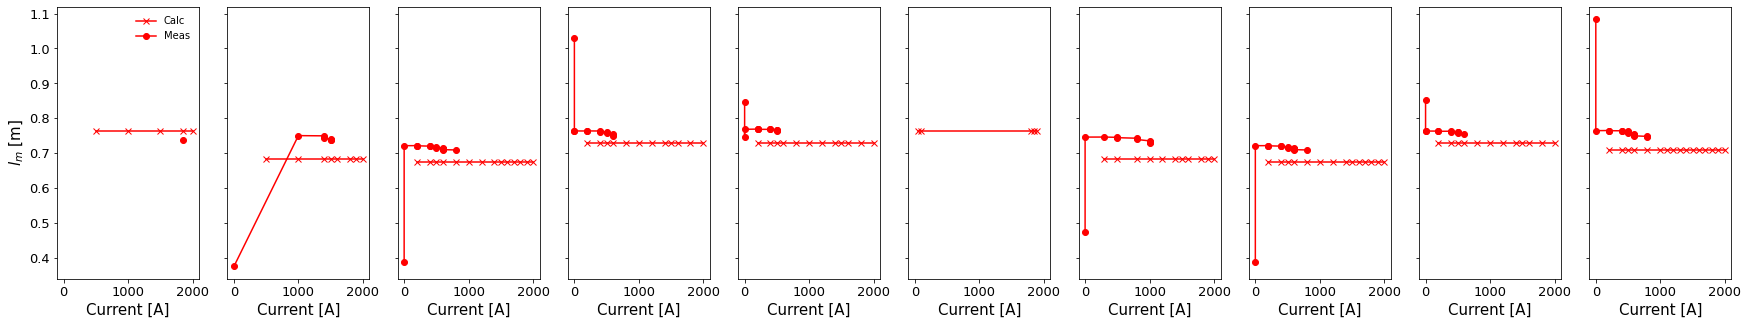

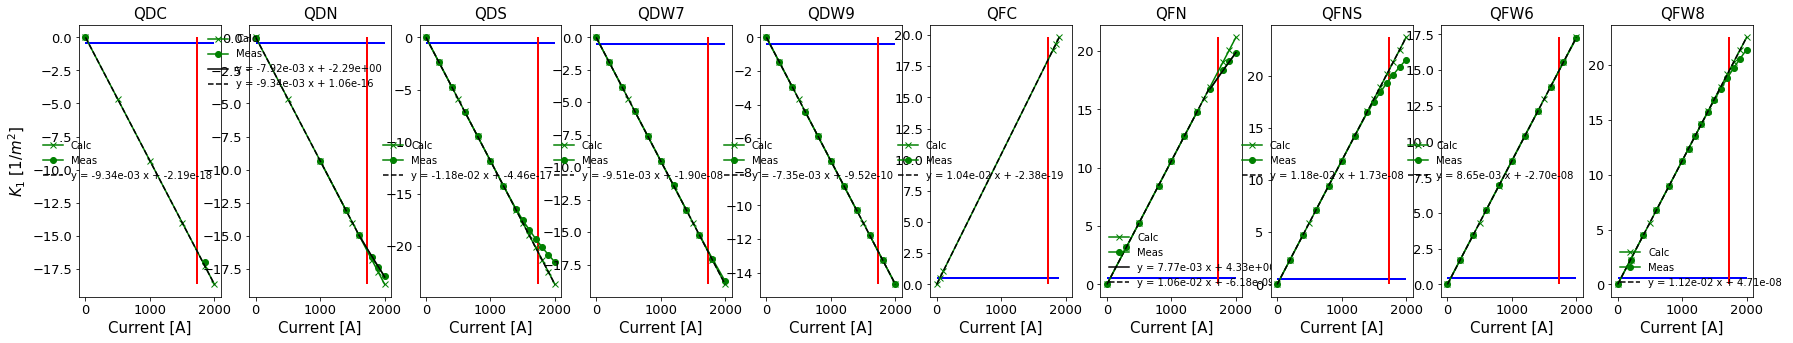

In [8]:
f, ax = plt.subplots(1, len(quads_families), figsize = (30,5), sharex = True, sharey = True)
f1, ax1 = plt.subplots(1, len(quads_families), figsize = (30,5), sharex = True, sharey = True)
f2, ax2 = plt.subplots(1, len(quads_families), figsize = (30,5), sharex = True, sharey = False)

for i, quad in enumerate(quads_families):
    QuadrupolesData = pd.DataFrame()
    FitQuadrupolesMagneticCurves = pd.DataFrame()
    
    FilesInFolder = os.listdir(quads_directory_path + str("%s"%quad))
    os.chdir(quads_directory_path + str("%s"%quad))
    print(quads_directory_path + str("%s"%quad))
    if "D" in quad:
        sign_strenght = -1
    else:
        sign_strenght = 1
    
    if quad == "QDS":
        os.chdir(quads_directory_path + str("QFNS"))
        FilesInFolder = os.listdir(quads_directory_path + str("QFNS"))
        sign_strenght = -1
        print()
        print(os.getcwd())
        
    # get central and integral field for every magnet family
    for h, file in enumerate(FilesInFolder):
        if 'central' in str(file):
            print(h, file)
            df = pd.read_csv("%s"%file)
            Current_CentralField = df.Current
            CentralField_Calc = df.Calculated
            try:
                CentralField_Measured = df.MMdata
            except AttributeError:
                CentralField_Measured = np.zeros(len(CentralField_Calc)) * np.nan
                print("No measurements done on the central field for this magnet family")
        elif 'int' in str(file):
            print(h, file)
            df = pd.read_csv("%s"%file)
            Current_IntField = df.Current
            IntField_Calc = df.Calculated
            try:
                IntField_Measured = df.MMdata
            except AttributeError:
                IntField_Measured = np.zeros(len(IntField_Measured)) * np.nan
                print("No measurements done on the integrated field for this magnet family")
                
    #calculation MAGNETIC LENGHT            
    ML_Calculated = MagneticLenght(IntField_Calc.dropna(), CentralField_Calc.dropna())
    try:
        ML_Measured = MagneticLenght(IntField_Measured.dropna(), CentralField_Measured.dropna())
    except AttributeError:
        ML_Measured = MagneticLenght(IntField_Measured, CentralField_Measured)
    #calculation NORMALISED QUADRUPOLAR STRENGHT
    K1_quad_calc = CentralField_Calc/BRHO * sign_strenght # it is in 1/m^2
    K1_quad_meas = CentralField_Measured/BRHO * sign_strenght # it is in 1/m^2

    # make fit on K1 - normalised quadrupolar stenght 
    ##### linear fit for calculated data
    opt_coeff_linear , opt_covar_linear = spopt.curve_fit(LinearLaw, Current_CentralField, K1_quad_calc, p0 = [1e-3*sign_strenght, 0], check_finite = False)
    ##### linear fit to determine saturation contribution
    ind_1250A = np.where(Current_CentralField>1500)[0][0]
    opt_coeff_linear_1250A , opt_covar_linear_1250A = spopt.curve_fit(LinearLaw, Current_CentralField[ind_1250A:], K1_quad_meas[ind_1250A:], 
                                                                      p0 = [3e-4*sign_strenght, 0.4*sign_strenght], check_finite = False)
 
    #Central field plot
    ax[i].plot(Current_CentralField, CentralField_Calc, "x-k", label = "Central - calc")
    ax[i].plot(Current_CentralField, CentralField_Measured, "o-k", label = "Central - meas")
    #Integrated field plot
    ax[i].plot(Current_IntField, IntField_Calc, "x-b", label = "Integr - calc")
    ax[i].plot(Current_IntField, IntField_Measured, "o-b", label = "Integr - meas")
    #Features plot
    ax[i].set_xlabel ("Current [A]", size = 15)
    ax[i].tick_params (axis = "both", which = "major", labelsize = 13)
    ax[i].set_title("%s"%quad, size = 15)
    
    #Plot magnetic lenght
    ax1[i].plot(Current_CentralField, ML_Calculated, "x-r", label = "Calc")
    try:
        ax1[i].plot(Current_CentralField.iloc[IntField_Measured.dropna()], ML_Measured, "o-r", label = "Meas")
    except ValueError:
        pass
    #Features plot
    ax1[i].set_xlabel ("Current [A]", size = 15)
    ax1[i].tick_params (axis = "both", which = "major", labelsize = 13)
    
    #plot normalised quad coefficient k1 [1/m^2]
    ax2[i].plot(Current_CentralField, K1_quad_calc, "x-g", label = "Calc")
    ax2[i].plot(Current_CentralField, K1_quad_meas, "o-g", label = "Meas")
    #add fit
    ax2[i].hlines(y = Strenght_Madx[i], xmin = 0, xmax = max(Current_CentralField), ls = "-", color = "b", lw = 2)
    ax2[i].vlines(x = 1730, ymin = max(np.abs(K1_quad_calc))*sign_strenght, ymax = min(np.abs(K1_quad_calc))*sign_strenght, ls = "-", color = "r", lw = 2)
    ax2[i].legend(frameon = False)
    #Features plot
    ax2[i].set_xlabel ("Current [A]", size = 15)
    ax2[i].tick_params (axis = "both", which = "major", labelsize = 13)
    ax2[i].set_title("%s"%quad, size = 15)
    
    if (np.abs(np.abs(LinearLaw(1500, *opt_coeff_linear_1250A)) - np.abs(LinearLaw(1250, *opt_coeff_linear))) < 0.1) or (quad == "QDN") or (quad == "QFN"):
        state = "saturation"
        if quad == "QDN":
            pass
            #opt_coeff_linear_1250A = [-2.45e-4, -0.015]#this is good for 3.57GeV/c
            #opt_coeff_linear_1250A = [-3.97e-4, -0.10]#this is good for 2GeV/c
        elif quad == "QFN":
            pass
            #opt_coeff_linear_1250A = [2.3e-4, 0.095]#this is good for 3.57GeV/c
            #opt_coeff_linear_1250A = [3.8e-4, 0.23]#this is good for 2.0GeV/c
        ax2[i].plot(Current_CentralField[ind_1250A:], LinearLaw(Current_CentralField[ind_1250A:] , *opt_coeff_linear_1250A), "-k", label = "y = %1.2e x + %1.2e"%(opt_coeff_linear_1250A[0], opt_coeff_linear_1250A[1]))
        ax2[i].plot(Current_CentralField[:ind_1250A+1], LinearLaw(Current_CentralField[:ind_1250A+1] , *opt_coeff_linear), "--k", label = "y = %1.2e x + %1.2e"%(opt_coeff_linear[0], opt_coeff_linear[1]))
        ax2[i].legend(frameon = False)
    else:
        ax2[i].plot(Current_CentralField, LinearLaw(Current_CentralField, *opt_coeff_linear), "--k", label = "y = %1.2e x + %1.2e"%(opt_coeff_linear[0], opt_coeff_linear[1]))
        state = "linear"
        opt_coeff_linear_1250A = [0, 0]
        ax2[i].legend(frameon = False)
    
    QuadrupolesData[str("Current")] = Current_CentralField
    QuadrupolesData[str("Calculated")] = K1_quad_calc
    QuadrupolesData[str("Measured")] = K1_quad_meas
    QuadrupolesData.to_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/Quads_%s_NormStrenght_%s_GeV.csv"%(quad, str(BeamMomentum)), index = False)
    
    FitQuadrupolesMagneticCurves["linear"] = opt_coeff_linear
    FitQuadrupolesMagneticCurves["saturation_1250A"] = opt_coeff_linear_1250A
    FitQuadrupolesMagneticCurves.to_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/FIT_Quads_%s_StrenghtCurrent_%s_GeV.csv"%(quad, str(BeamMomentum)), index = False)
    
ax[0].set_ylabel ("B [T (int) or T/m (central)]", size = 15)
ax[0].legend(frameon = False)

ax1[0].set_ylabel ("$l_m$ [m]", size = 15)
ax1[0].legend(frameon = False)

ax2[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)
ax2[0].legend(frameon = False)

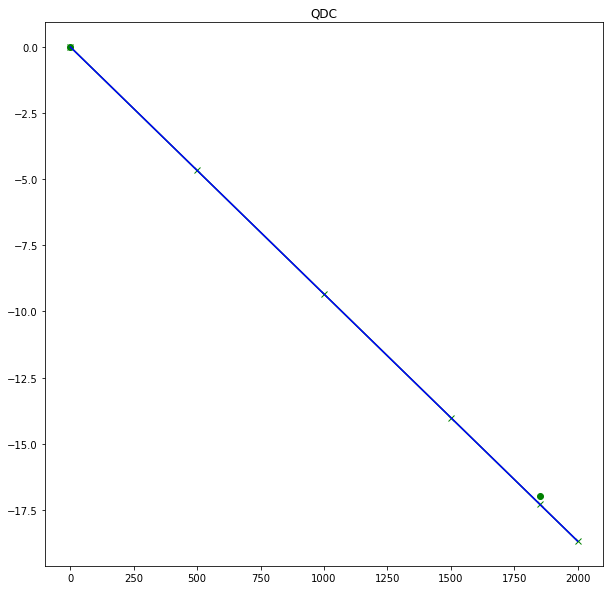

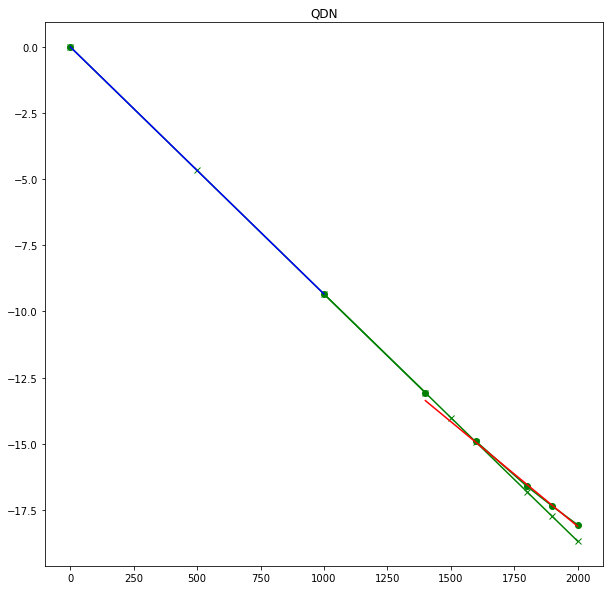

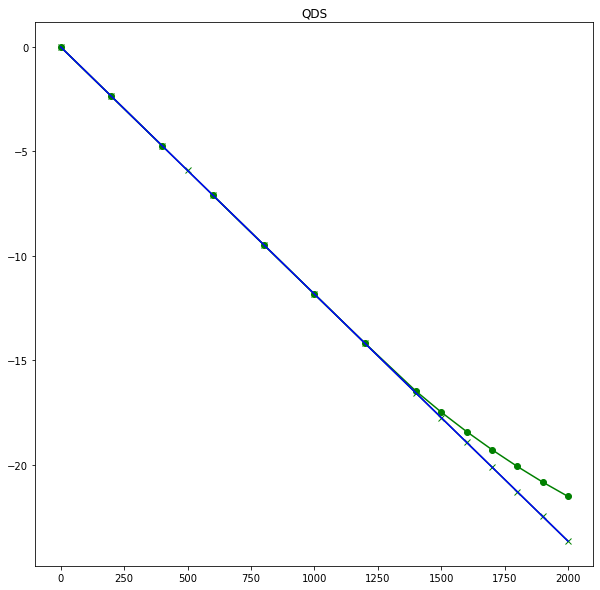

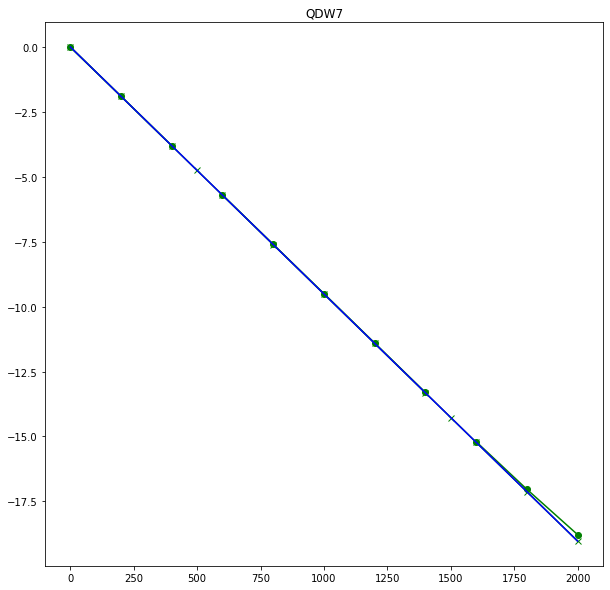

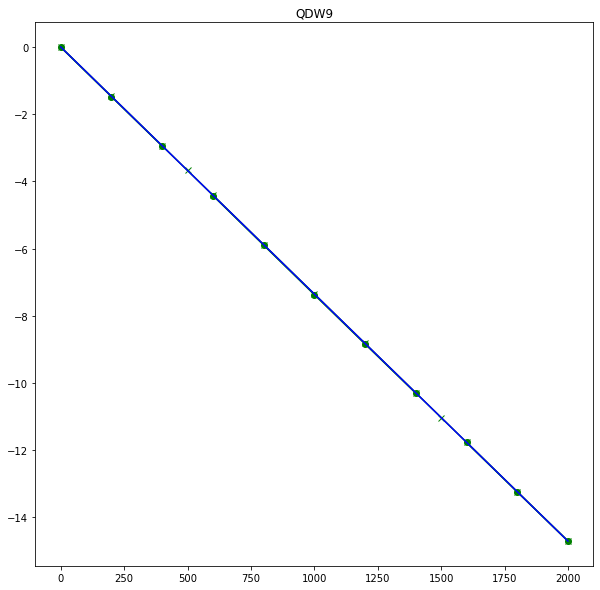

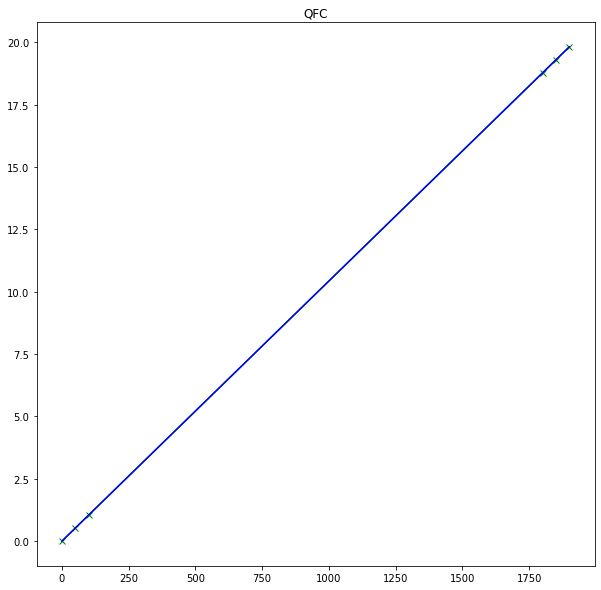

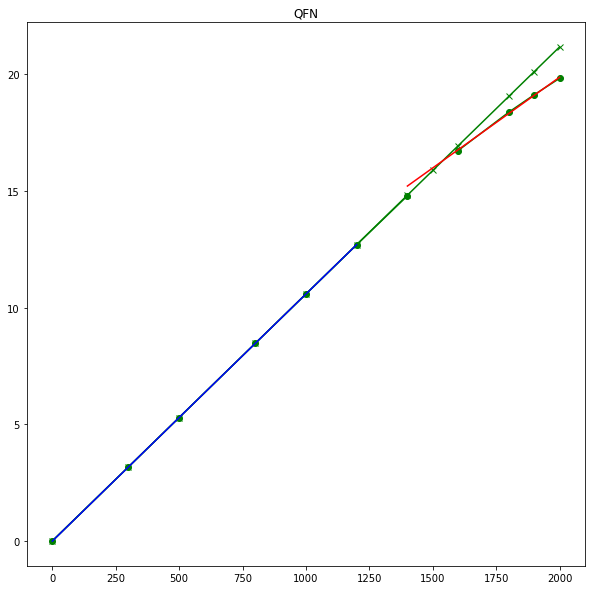

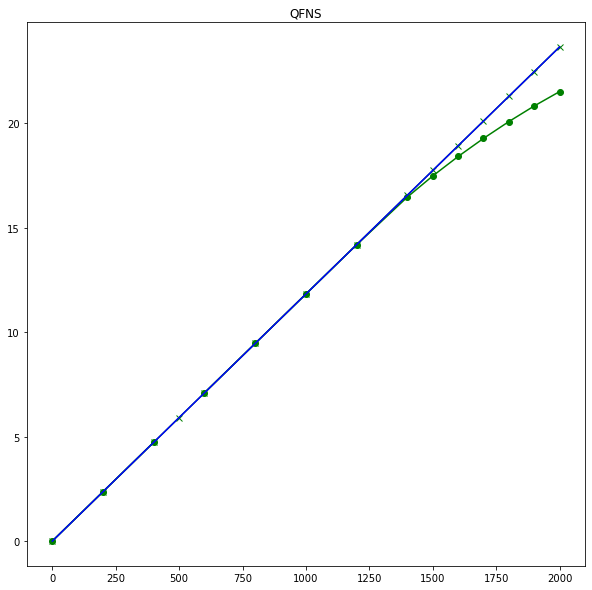

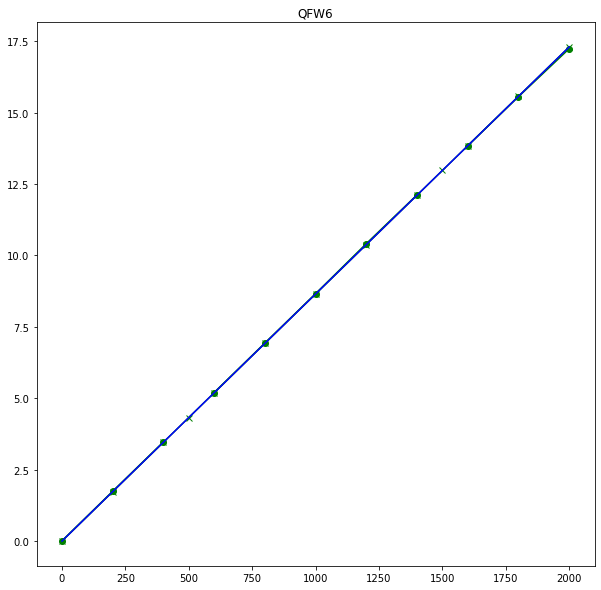

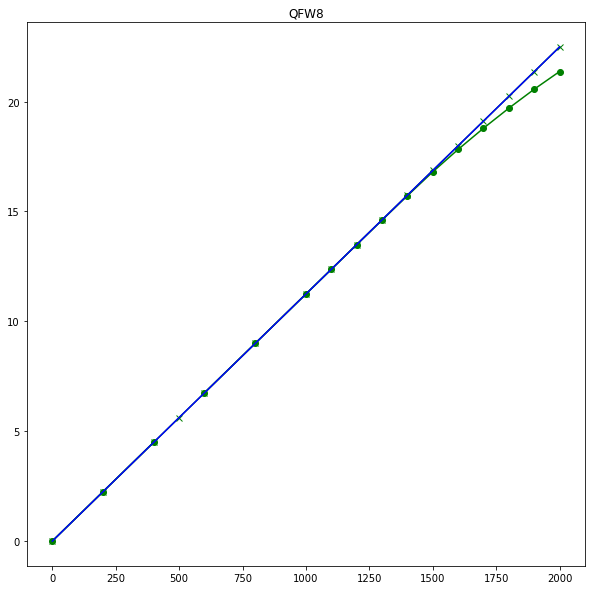

In [9]:
for i, quad in enumerate(quads_families):
    
    f, ax = plt.subplots(1, 1, figsize = (10,10))
    
    df_quad = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/Quads_%s_NormStrenght_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    df_fit = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/FIT_Quads_%s_StrenghtCurrent_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    ax.set_title("%s"%quad)
    ax.plot(df_quad.Current, df_quad.Calculated, "x-g")
    ax.plot(df_quad.Current, df_quad.Measured, "o-g")
    if df_fit['saturation_1250A'].values[0] == 0:
        ax.plot(df_quad.Current, LinearLaw(df_quad.Current, *df_fit.linear), "-b")
    else:
        ax.plot(df_quad[df_quad.Current<1250].Current, 
                LinearLaw(df_quad[df_quad.Current<1250].Current, *df_fit.linear), "-b")
        ax.plot(df_quad[df_quad.Current>1250].Current, 
                LinearLaw(df_quad[df_quad.Current>1250].Current, *df_fit.saturation_1250A), "-r")